In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/home/ye12/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
lambda_params = [float('%.3g' % i) for i in pickle.load(open('lambda_params', 'rb'))][:-1]
calculated_proportions = pickle.load(open('calculated_proportions', 'rb'))
number_samples = pickle.load(open('number_samples', 'rb'))

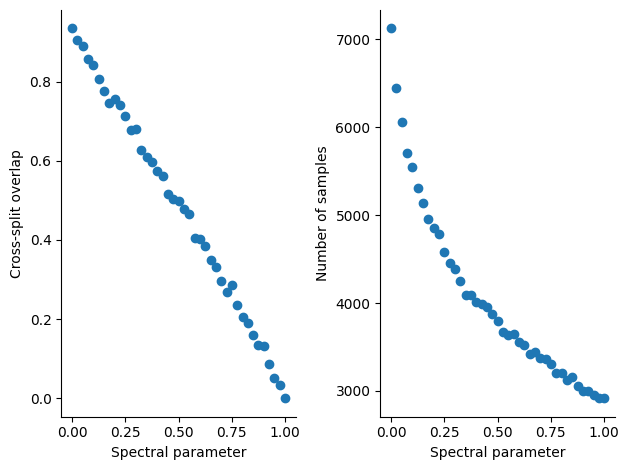

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.scatter(lambda_params, calculated_proportions)
ax1.set_ylabel('Cross-split overlap')
ax1.set_xlabel('Spectral parameter')
ax1.spines[['right', 'top']].set_visible(False)
ax2.scatter(lambda_params, number_samples)
ax2.set_ylabel('Number of samples')
ax2.set_xlabel('Spectral parameter')
ax2.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig('TAPE_secondary_structure_split_stats.pdf')

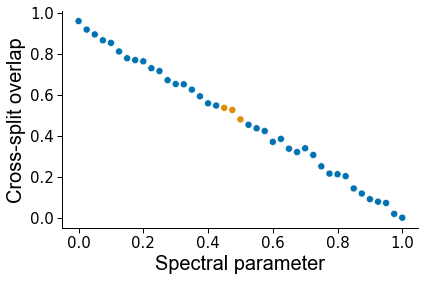

In [110]:
sns.set_palette('colorblind')
df = pd.DataFrame({'x': lambda_params, 'y': calculated_proportions, 'label': [1 if i in [0.5, 0.45, 0.475] else 0 for i in lambda_params]})
ax1 = sns.scatterplot(x = 'x', y = 'y', data = df, s = 50, hue= 'label')
ax1.set_ylabel('Cross-split overlap', fontsize=20, family='Arial')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel('Spectral parameter', fontsize=20, family='Arial')
sns.set_context("paper")
plt.tight_layout()
sns.despine()
ax1.get_legend().remove()
plt.savefig('TAPE_secondary_structure_css.pdf')

In [111]:
def find_closest(overlap, x, y):
    min_difference = 1000000
    best_overlap = None
    best_param = None
    
    
    for i,j in zip(x, y):
        if abs(overlap - j) < min_difference:
            best_param = i
            best_overlap = j
            min_difference = abs(overlap - j)
    
    return f"{best_overlap} and {best_param} for {overlap}"
    

In [112]:
"""
Precalculated overlaps

CASP 12: 10/21 = 48%
TS115: 62/115 = 54%
CB513: 225/434 = 52%

"""

print(f"CASP12 results {find_closest(0.48, lambda_params[:-1], calculated_proportions)}")
print(f"TS115 results {find_closest(0.54, lambda_params[:-1], calculated_proportions)}")
print(f"CB513 results {find_closest(0.52, lambda_params[:-1], calculated_proportions)}")

CASP12 results 0.479002624671916 and 0.5 for 0.48
TS115 results 0.5353016688061617 and 0.45 for 0.54
CB513 results 0.5251612903225806 and 0.475 for 0.52


In [113]:
TAPE_results = {'model': ['Transformer no pretrain','Transformer no pretrain', 'Transformer no pretrain', 
        'Transformer pretrain', 'Transformer pretrain', 'Transformer pretrain','HHblits', 'HHblits', 'HHblits'],
        'split': ['CB513', 'CASP12', 'TS115','CB513', 'CASP12', 'TS115', 'CB513', 'CASP12', 'TS115'],
        'performance': [0.70, 0.68, 0.73, 0.73, 0.71, 0.77, 0.8, 0.76, 0.81], 
         'SP': [0.475, 0.5, 0.45,0.475, 0.5, 0.45,0.475, 0.5, 0.45]} 
TAPE_results = pd.DataFrame(TAPE_results)


In [114]:
TAPE_results

,model,split,performance,SP
0,Transformer no pretrain,CB513,0.70,0.475
1,Transformer no pretrain,CASP12,0.68,0.500
2,Transformer no pretrain,TS115,0.73,0.450
3,Transformer pretrain,CB513,0.73,0.475
4,Transformer pretrain,CASP12,0.71,0.500
5,Transformer pretrain,TS115,0.77,0.450
6,HHblits,CB513,0.80,0.475
7,HHblits,CASP12,0.76,0.500
8,HHblits,TS115,0.81,0.450


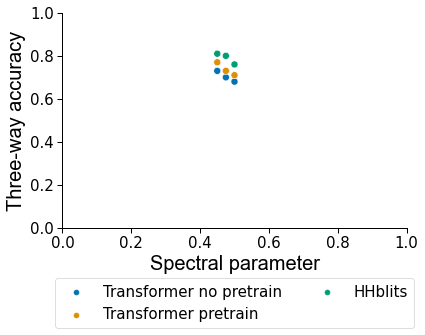

In [117]:
sns.set_palette('colorblind')
ax1 = sns.scatterplot(x = 'SP', y = 'performance', data = TAPE_results, hue= 'model', s = 50)
ax1.set_ylabel('Three-way accuracy', fontsize=20, family='Arial')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel('Spectral parameter', fontsize=20, family='Arial')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
sns.set_context("paper")
plt.tight_layout()
plt.legend(prop={'size': 15}, bbox_to_anchor=(0.5, -0.2),loc='upper center', ncol=2)
sns.despine()
plt.savefig('TAPE_secondary_structure_spc.pdf',  bbox_inches='tight')